# Klasifikasi Menggunakan K-Nearest Neighbor dengan Brute Force

# Import Modul

In [1]:
## Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import pickle

# Import Dataset

In [2]:
#memanggil data csv
data = pd.read_csv('dataset/Dataset.csv', sep=',')
data.head()

,No,NIM,NAMA,PRODI,FAKULTAS,UKT,NILAI UKT,PENGHASILAN AYAH,PENGHASILAN IBU,TOTAL PENGHASILAN,"Jumlah Anggota Keluarga (Ayah, Ibu dan Anak)",TOTAL PENGHASILAN/JUMLAH ANGGOTA KEL,STATUS AYAH,STATUS IBU,STATUS KIP,STATUS TDK MAMPU,STATUS KKS,STATUS_LULUS_KIP
0,1,1.217052e+10,WIDYA YOLANDA,Ilmu Administrasi Negara,Ekonomi dan Ilmu Sosial,3.0,2400000.0,1500000,0,1500000,4.0,375000.0000,File Tidak Diupload,File Tidak Diupload,File Diupload,File Diupload,File Diupload,LULUS
1,2,1.214022e+10,MARDHEA,Bimb. Konseling Islam,Dakwah dan Komunikasi,3.0,2400000.0,1000000,0,1000000,5.0,200000.0000,File Diupload,File Diupload,File Diupload,File Diupload,File Diupload,LULUS
2,3,1.215021e+10,Muhammad Rozi,Teknik Industri,Sains dan Teknologi,4.0,3600000.0,3500000,0,3500000,5.0,700000.0000,File Tidak Diupload,File Tidak Diupload,File Diupload,File Diupload,File Diupload,LULUS
3,4,1.211032e+10,AMELIA MAWADDAH,Manajemen Pend. Islam,Tarbiyah dan Perguruan,2.0,1825000.0,700000,0,700000,6.0,116666.6667,File Tidak Diupload,File Tidak Diupload,File Diupload,File Diupload,File Diupload,LULUS
4,5,1.212072e+10,AMANDA NADYA RONA,Ilmu Hukum,Syari'ah dan Hukum,4.0,3200000.0,3000000,0,3000000,5.0,600000.0000,File Tidak Diupload,File Tidak Diupload,File Tidak Diupload,File Tidak Diupload,File Tidak Diupload,TIDAK LULUS


# Preprocessing Dataset

Cek Missing Value

In [3]:
print (data.isnull().sum())

No                                                0
NIM                                              14
NAMA                                             13
PRODI                                            14
FAKULTAS                                         14
UKT                                              14
NILAI UKT                                        14
PENGHASILAN AYAH                                  0
PENGHASILAN IBU                                   0
TOTAL PENGHASILAN                                 0
Jumlah Anggota Keluarga (Ayah, Ibu dan Anak)    134
TOTAL PENGHASILAN/JUMLAH ANGGOTA KEL            134
STATUS AYAH                                       0
STATUS IBU                                        0
STATUS KIP                                        0
STATUS TDK MAMPU                                  0
STATUS KKS                                        0
STATUS_LULUS_KIP                                  0
dtype: int64


Drop Missing Value

In [4]:
df=data.dropna()

In [5]:
print(df["PRODI"].unique())

['Ilmu Administrasi Negara' 'Bimb. Konseling Islam' 'Teknik Industri'
 'Manajemen Pend. Islam' 'Ilmu Hukum' 'Pendidikan Bahasa Inggris'
 'Pendidikan Bahasa Indonesia' 'Pendidikan Geografi' 'Akuntansi'
 'Pendidikan Guru MI' 'Hk. Ekonomi Syariah (Mua)' 'Tadris IPA'
 'Ekonomi Syariah' 'Agroteknologi'
 'Bimbingan dan Konseling Pendidikan Islam' 'Pendidikan Matematika'
 'Pendidikan Ekonomi' 'Pendidikan Agama Islam'
 'Pend. Islam Anak Usia Dini' 'Studi Agama Agama' 'Tadris IPS'
 'Peternakan' 'GIZI' 'Teknik Informatika' 'Psikologi'
 'Hk. Tata Negara (Siyasah)' 'Ilmu Alquran dan Tafsir'
 'Pendidikan Bahasa Arab' 'Ilmu Hadis' 'Matematika' 'Ilmu Komunikasi'
 'Peng. Masyarakat Islam' 'Hukum Keluarga (AH)' 'Manajemen'
 'Perbandingan Madzhab' 'Manajemen Dakwah' 'Sistem Informasi'
 'Teknik Elektro' 'Aqidah dan Filsafat Islam' 'Pendidikan Kimia'
 'D-III Perpajakan' 'D-III Man. Perusahaan' 'D-III Perbankan Syariah'
 'D-III Akuntansi']


In [6]:
print(df.drop_duplicates(subset = "PRODI"))

      No           NIM                             NAMA  \
0      1  1.217052e+10                    WIDYA YOLANDA   
1      2  1.214022e+10                          MARDHEA   
2      3  1.215021e+10                    Muhammad Rozi   
3      4  1.211032e+10                  AMELIA MAWADDAH   
4      5  1.212072e+10                AMANDA NADYA RONA   
5      6  1.211042e+10               SYARIFAH INDRIYANI   
8      9  1.211122e+10                    LIA MAKHMUDAH   
9     10  1.211132e+10              ROSINTA AYANI PUTRI   
11    12  1.217032e+10                     Widya Monica   
12    13  1.211082e+10              SUCI LARASATI EFLIN   
13    14  1.212022e+10                      ANNA ZAHARA   
15    16  1.211112e+10             LIZA MAULIDA SIAGIAN   
17    18  1.212051e+10                      SITIJI ILMI   
18    19  1.218022e+10                  Sahrani Tanjung   
21    22  1.211162e+10                    MIFTAHHURAHMI   
24    25  1.211051e+10             JABAL YASIR NASUTION 

In [7]:
print (df.isnull().sum())

No                                              0
NIM                                             0
NAMA                                            0
PRODI                                           0
FAKULTAS                                        0
UKT                                             0
NILAI UKT                                       0
PENGHASILAN AYAH                                0
PENGHASILAN IBU                                 0
TOTAL PENGHASILAN                               0
Jumlah Anggota Keluarga (Ayah, Ibu dan Anak)    0
TOTAL PENGHASILAN/JUMLAH ANGGOTA KEL            0
STATUS AYAH                                     0
STATUS IBU                                      0
STATUS KIP                                      0
STATUS TDK MAMPU                                0
STATUS KKS                                      0
STATUS_LULUS_KIP                                0
dtype: int64


In [8]:
df['STATUS_LULUS_KIP'].value_counts()

TIDAK LULUS    1157
LULUS           999
Name: STATUS_LULUS_KIP, dtype: int64

Data Encoding

In [9]:
df['STATUS_LULUS_KIP id'] = df['STATUS_LULUS_KIP'].factorize()[0]
kategori_id_df = df[['STATUS_LULUS_KIP', 'STATUS_LULUS_KIP id']].drop_duplicates().sort_values('STATUS_LULUS_KIP id')
kategori_to_id = dict(kategori_id_df.values)
id_to_kategori = dict(kategori_id_df[['STATUS_LULUS_KIP id', 'STATUS_LULUS_KIP']].values)

C:\Users\ASUS~1\AppData\Local\Temp/ipykernel_22060/1752223893.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['STATUS_LULUS_KIP id'] = df['STATUS_LULUS_KIP'].factorize()[0]


In [10]:
id_to_kategori

{0: 'LULUS', 1: 'TIDAK LULUS'}

In [11]:
labelencoder = LabelEncoder()
df['FAKULTAS'] = labelencoder.fit_transform(df['FAKULTAS'])
df['STATUS AYAH'] = labelencoder.fit_transform(df['STATUS AYAH'])
df['STATUS IBU'] = labelencoder.fit_transform(df['STATUS IBU'])
df['STATUS KIP'] = labelencoder.fit_transform(df['STATUS KIP'])
df['STATUS TDK MAMPU'] = labelencoder.fit_transform(df['STATUS TDK MAMPU'])
df['STATUS KKS'] = labelencoder.fit_transform(df['STATUS KKS'])

C:\Users\ASUS~1\AppData\Local\Temp/ipykernel_22060/3393308121.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FAKULTAS'] = labelencoder.fit_transform(df['FAKULTAS'])
C:\Users\ASUS~1\AppData\Local\Temp/ipykernel_22060/3393308121.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['STATUS AYAH'] = labelencoder.fit_transform(df['STATUS AYAH'])
C:\Users\ASUS~1\AppData\Local\Temp/ipykernel_22060/3393308121.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [12]:
df.head()

,No,NIM,NAMA,PRODI,FAKULTAS,UKT,NILAI UKT,PENGHASILAN AYAH,PENGHASILAN IBU,TOTAL PENGHASILAN,"Jumlah Anggota Keluarga (Ayah, Ibu dan Anak)",TOTAL PENGHASILAN/JUMLAH ANGGOTA KEL,STATUS AYAH,STATUS IBU,STATUS KIP,STATUS TDK MAMPU,STATUS KKS,STATUS_LULUS_KIP,STATUS_LULUS_KIP id
0,1,1.217052e+10,WIDYA YOLANDA,Ilmu Administrasi Negara,1,3.0,2400000.0,1500000,0,1500000,4.0,375000.0000,1,1,0,0,0,LULUS,0
1,2,1.214022e+10,MARDHEA,Bimb. Konseling Islam,0,3.0,2400000.0,1000000,0,1000000,5.0,200000.0000,0,0,0,0,0,LULUS,0
2,3,1.215021e+10,Muhammad Rozi,Teknik Industri,4,4.0,3600000.0,3500000,0,3500000,5.0,700000.0000,1,1,0,0,0,LULUS,0
3,4,1.211032e+10,AMELIA MAWADDAH,Manajemen Pend. Islam,6,2.0,1825000.0,700000,0,700000,6.0,116666.6667,1,1,0,0,0,LULUS,0
4,5,1.212072e+10,AMANDA NADYA RONA,Ilmu Hukum,5,4.0,3200000.0,3000000,0,3000000,5.0,600000.0000,1,1,1,1,1,TIDAK LULUS,1


Menentukan Variabel X dan Y

In [13]:
#Extract data
X = df.iloc[:,5:17]
y = df.iloc[:,-1]

In [14]:
X.head()

,UKT,NILAI UKT,PENGHASILAN AYAH,PENGHASILAN IBU,TOTAL PENGHASILAN,"Jumlah Anggota Keluarga (Ayah, Ibu dan Anak)",TOTAL PENGHASILAN/JUMLAH ANGGOTA KEL,STATUS AYAH,STATUS IBU,STATUS KIP,STATUS TDK MAMPU,STATUS KKS
0,3.0,2400000.0,1500000,0,1500000,4.0,375000.0000,1,1,0,0,0
1,3.0,2400000.0,1000000,0,1000000,5.0,200000.0000,0,0,0,0,0
2,4.0,3600000.0,3500000,0,3500000,5.0,700000.0000,1,1,0,0,0
3,2.0,1825000.0,700000,0,700000,6.0,116666.6667,1,1,0,0,0
4,4.0,3200000.0,3000000,0,3000000,5.0,600000.0000,1,1,1,1,1


In [15]:
X.to_csv('dataset/X.csv', index=False)

In [16]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: STATUS_LULUS_KIP id, dtype: int64

In [17]:
y.to_csv('dataset/y.csv', index=False)

Train dan Test Split

In [18]:
# membagi data set menggunakan sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

Normalisasi Data Menggunakan Standar Scaler

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

##### Model KNN

Membangun Model KNN Brute Force

In [20]:
#membuat model KNN
Model_KNN = KNeighborsClassifier(algorithm='brute')

In [21]:
from sklearn.model_selection import GridSearchCV
parameters_KNN = {
    'n_neighbors': (1,10, 1),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev')}
                   
# with GridSearch
grid_search_KNN = GridSearchCV(
    estimator=Model_KNN,
    param_grid=parameters_KNN,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)

In [22]:
grid_search_KNN.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(algorithm='brute'), n_jobs=-1,
             param_grid={'leaf_size': (20, 40, 1),
                         'metric': ('minkowski', 'chebyshev'),
                         'n_neighbors': (1, 10, 1), 'p': (1, 2),
                         'weights': ('uniform', 'distance')},
             scoring='accuracy')

In [23]:
print(grid_search_KNN.best_params_ ) 

{'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}


Menyimpan Model Ke Disk

In [24]:
# Saving model to disk
pickle.dump(grid_search_KNN, open('model/Model_KNN.pkl','wb'))

In [25]:
# Loading model to compare the results
grid_search_KNN = pickle.load(open('model/Model_KNN.pkl','rb'))

Prediksi Data Testing

In [26]:
y_pred = grid_search_KNN.predict(X_test)
y_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,

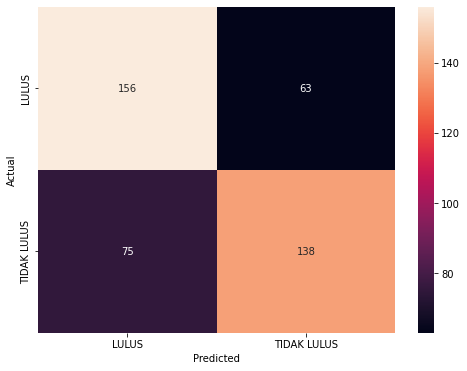

In [27]:
#confunction matrix
kategori_id_data = df[['STATUS_LULUS_KIP']].drop_duplicates().sort_values('STATUS_LULUS_KIP')
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=kategori_id_data.STATUS_LULUS_KIP.values, yticklabels=kategori_id_data.STATUS_LULUS_KIP.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [28]:
#Confussions Matrix
y_pred = grid_search_KNN.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.71      0.69       219
           1       0.69      0.65      0.67       213

    accuracy                           0.68       432
   macro avg       0.68      0.68      0.68       432
weighted avg       0.68      0.68      0.68       432



In [29]:
#penginputan data baru yang ingin di prediksi
databaru = {'UKT' : [1],'NILAI UKT' : [2400000],'PENGHASILAN AYAH' : [1000000], 'PENGHASILAN IBU' : [300000], 'TOTAL PENGHASILAN' : [1300000], 'Jumlah Anggota Keluarga (Ayah, Ibu dan Anak)' : [6],'TOTAL PENGHASILAN/JUMLAH ANGGOTA KEL' :[216666.6667],'STATUS AYAH' :[1],'STATUS IBU' :[0],'STATUS KIP' :[1],'STATUS TDK MAMPU' :[0],'STATUS KKS' :[1] }
baru = pd.DataFrame(data = databaru)
baru

,UKT,NILAI UKT,PENGHASILAN AYAH,PENGHASILAN IBU,TOTAL PENGHASILAN,"Jumlah Anggota Keluarga (Ayah, Ibu dan Anak)",TOTAL PENGHASILAN/JUMLAH ANGGOTA KEL,STATUS AYAH,STATUS IBU,STATUS KIP,STATUS TDK MAMPU,STATUS KKS
0,1,2400000,1000000,300000,1300000,6,216666.6667,1,0,1,0,1


In [30]:
X_Baru=scaler.transform(baru)

In [31]:
X_Baru

array([[-1.9054969 ,  0.01948536, -0.22637024,  0.20445027, -0.10933859,
         0.51436929, -0.36002718,  0.42142096, -3.09462229,  0.80021405,
        -0.32532611,  0.83577639]])

In [32]:
#prediksi data baru
pred = grid_search_KNN.predict(X_Baru)
pred = int(pred)
hasil = id_to_kategori[pred]
print(hasil)

LULUS


In [33]:
X_baru = pd.read_csv('dataset/X.csv')
y_baru = pd.read_csv('dataset/y.csv')

In [34]:
X_baru

,UKT,NILAI UKT,PENGHASILAN AYAH,PENGHASILAN IBU,TOTAL PENGHASILAN,"Jumlah Anggota Keluarga (Ayah, Ibu dan Anak)",TOTAL PENGHASILAN/JUMLAH ANGGOTA KEL,STATUS AYAH,STATUS IBU,STATUS KIP,STATUS TDK MAMPU,STATUS KKS
0,3.0,2400000.0,1500000,0,1500000,4.0,375000.0000,1,1,0,0,0
1,3.0,2400000.0,1000000,0,1000000,5.0,200000.0000,0,0,0,0,0
2,4.0,3600000.0,3500000,0,3500000,5.0,700000.0000,1,1,0,0,0
3,2.0,1825000.0,700000,0,700000,6.0,116666.6667,1,1,0,0,0
4,4.0,3200000.0,3000000,0,3000000,5.0,600000.0000,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2151,3.0,1850000.0,3287360,0,3287360,5.0,657472.0000,1,1,0,0,0
2152,3.0,1850000.0,0,500000,500000,2.0,250000.0000,1,1,1,0,1
2153,3.0,1650000.0,1000000,0,1000000,3.0,333333.3333,1,1,1,0,1
2154,3.0,1850000.0,2000000,0,2000000,8.0,250000.0000,1,1,1,0,1


In [35]:
# membagi data set menggunakan sklearn
X_train, X_test, y_train, y_test = train_test_split(X_baru, y_baru, test_size = 0.2, random_state = 25)